# Credit Card - Fraud Detection

***
Problem asks us to build a model to identify if a transaction is fraudulent or not. <br>
We have been provided dataset along with label if it was fraudulent or not. <br>We can thus train a supervised model for this classfication problem.

•	Understanding - Problem statement<br>
•	Perform exploratory data analysis<br>
•	Preprocess the data<br>
•	Select Training data, test data <br>
•	Train the model <br>
•	Test the model (Predictions and reporting)<br>
•	Evaluate the model performance<br>
•	Suggest ways of improving the model

***

## Loading Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("card_transdata.csv")

In [4]:
df.sample(10)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
114577,4.212472,2.749726,0.684579,1.0,1.0,0.0,0.0,0.0
63893,17.248376,0.437334,1.053239,1.0,0.0,0.0,1.0,0.0
711376,125.571070,5.920959,1.224010,1.0,0.0,0.0,1.0,1.0
320814,6.374425,0.341468,0.481805,1.0,1.0,0.0,1.0,0.0
202014,5.854109,0.538516,1.249718,1.0,0.0,0.0,0.0,0.0
987939,45.971185,0.638486,0.478270,1.0,0.0,0.0,1.0,0.0
997971,27.663598,0.804347,0.321675,1.0,0.0,0.0,0.0,0.0
954142,17.599198,0.108088,1.924234,1.0,1.0,0.0,0.0,0.0
623307,12.561734,0.159279,4.543050,1.0,0.0,0.0,1.0,1.0
839182,80.633663,0.342246,1.204990,1.0,0.0,0.0,1.0,0.0


In [5]:
df_fraud = df.loc[df['fraud']==1]
print("Frauds :: {}".format(len(df_fraud)))
df_not_fraud = df.loc[df['fraud']==0]
print("Not Frauds :: {}".format(len(df_not_fraud)))
print("Percentage of fraud data :: {} %".format((len(df_fraud)/len(df))*100))

Frauds :: 87403
Not Frauds :: 912597
Percentage of fraud data :: 8.7403 %


***

## Exploratory Data Analysis

In [52]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df_fraud.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,87403.000000,87403.000000,87403.000000,87403.000000,87403.000000,87403.000000,87403.000000,87403.0
mean,66.261876,12.712185,6.006323,0.880119,0.256399,0.003123,0.946318,1.0
std,134.391608,47.997697,5.564320,0.324825,0.436647,0.055801,0.225391,0.0
min,0.025847,0.000407,0.011966,0.000000,0.000000,0.000000,0.000000,1.0
25%,4.585729,0.328199,3.500270,1.000000,0.000000,0.000000,1.000000,1.0
50%,15.454219,1.157631,5.071294,1.000000,0.000000,0.000000,1.000000,1.0
75%,101.110104,4.598504,7.331222,1.000000,1.000000,0.000000,1.000000,1.0
max,10632.723672,2160.499922,266.689692,1.000000,1.000000,1.000000,1.000000,1.0


### _Observations from above data distribution_:
 - Mean value of distance_from_home, distance_from_last_transaction and ratio_to_median_purchase_price almost double in case of fraud transactions

***

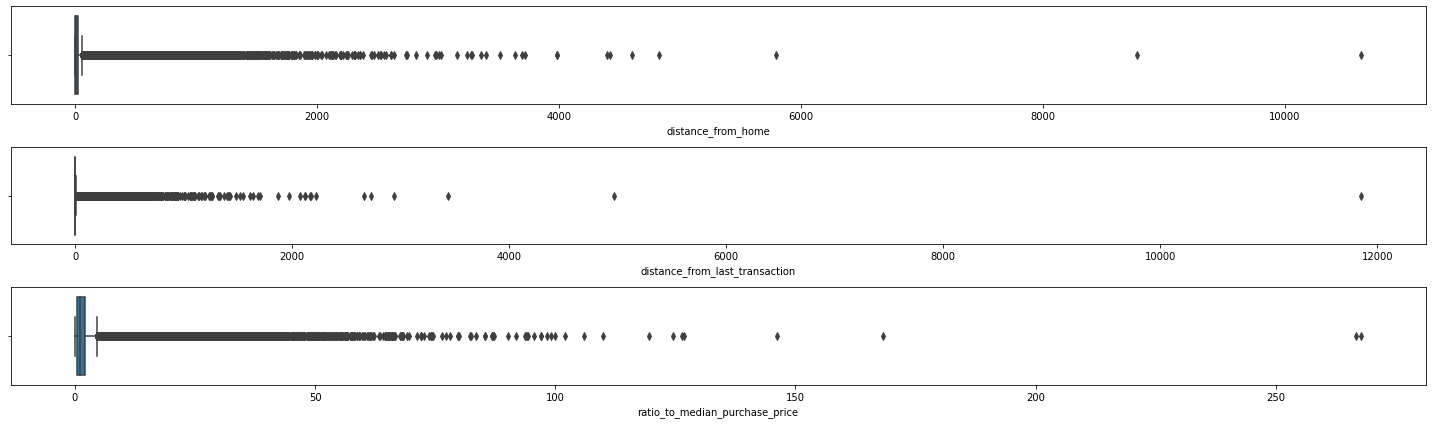

In [83]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(20,6))
sns.boxplot(df['distance_from_home'], ax=ax1)
sns.boxplot(df['distance_from_last_transaction'], ax=ax2)
sns.boxplot(df['ratio_to_median_purchase_price'], ax=ax3)
plt.tight_layout()
plt.show()

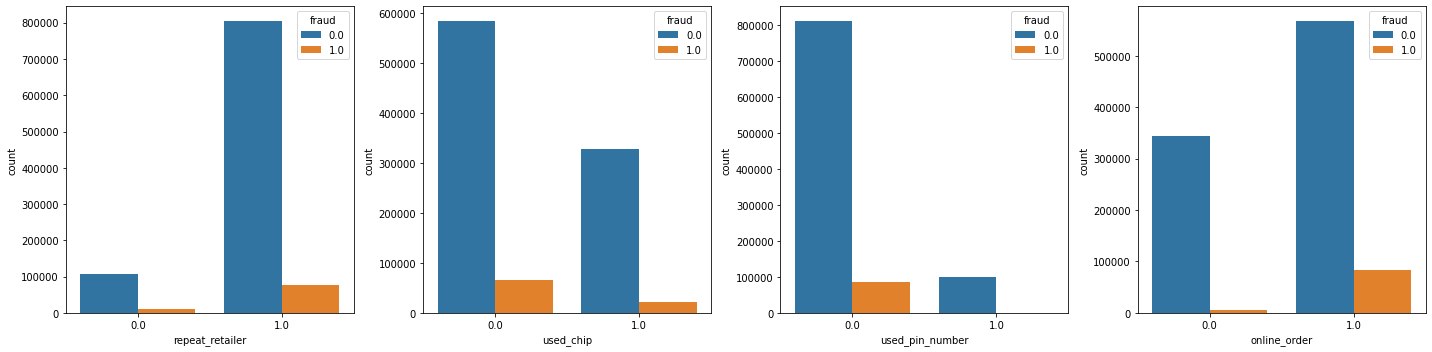

In [86]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(20,5))
sns.countplot(x = 'repeat_retailer', data=df, hue='fraud', ax=ax1)
sns.countplot(x = 'used_chip', data=df, hue='fraud', ax=ax2)
sns.countplot(x = 'used_pin_number', data=df, hue='fraud', ax=ax3)
sns.countplot(x = 'online_order', data=df, hue='fraud', ax=ax4)
plt.tight_layout()
plt.show()

### Find correlation between features
Plotting correlation matrices one for whole dataset and other for fraudulent data

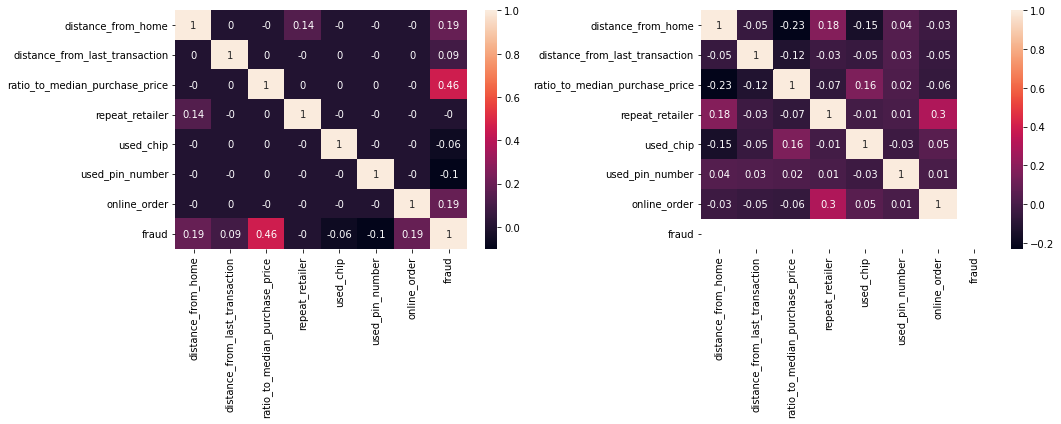

In [88]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,6))
sns.heatmap(round(df.corr(),2), annot=True, ax=ax1)
sns.heatmap(round(df_fraud.corr(),2), annot=True, ax=ax2)
plt.tight_layout()
plt.show()

### _Observations from above corrleation matrix_:
 - ratio_to_median_purchase_price has highest correlation with fraud
 - distance_from_home and online_order, also positively correlate to fraud
***

### Rule Mining
Now training a decision tree model for further exploratory analysis and mining rules from it

In [10]:
X = df.loc[:, df.columns != 'fraud']
y = df.fraud

In [11]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

clf = DecisionTreeClassifier(random_state=1234, max_depth=4)
model = clf.fit(X, y)

In [12]:
text_representation = tree.export_text(clf,feature_names=['distance_from_home','distance_from_last_transaction','ratio_to_median_purchase_price','repeat_retailer','used_chip','used_pin', 'online_order'])
print(text_representation)

|--- ratio_to_median_purchase_price <= 4.00
|   |--- distance_from_home <= 100.00
|   |   |--- distance_from_last_transaction <= 50.03
|   |   |   |--- distance_from_last_transaction <= 50.00
|   |   |   |   |--- class: 0.0
|   |   |   |--- distance_from_last_transaction >  50.00
|   |   |   |   |--- class: 0.0
|   |   |--- distance_from_last_transaction >  50.03
|   |   |   |--- online_order <= 0.50
|   |   |   |   |--- class: 0.0
|   |   |   |--- online_order >  0.50
|   |   |   |   |--- class: 1.0
|   |--- distance_from_home >  100.00
|   |   |--- online_order <= 0.50
|   |   |   |--- distance_from_last_transaction <= 50.14
|   |   |   |   |--- class: 0.0
|   |   |   |--- distance_from_last_transaction >  50.14
|   |   |   |   |--- class: 1.0
|   |   |--- online_order >  0.50
|   |   |   |--- used_chip <= 0.50
|   |   |   |   |--- class: 1.0
|   |   |   |--- used_chip >  0.50
|   |   |   |   |--- class: 0.0
|--- ratio_to_median_purchase_price >  4.00
|   |--- online_order <= 0.50
| 

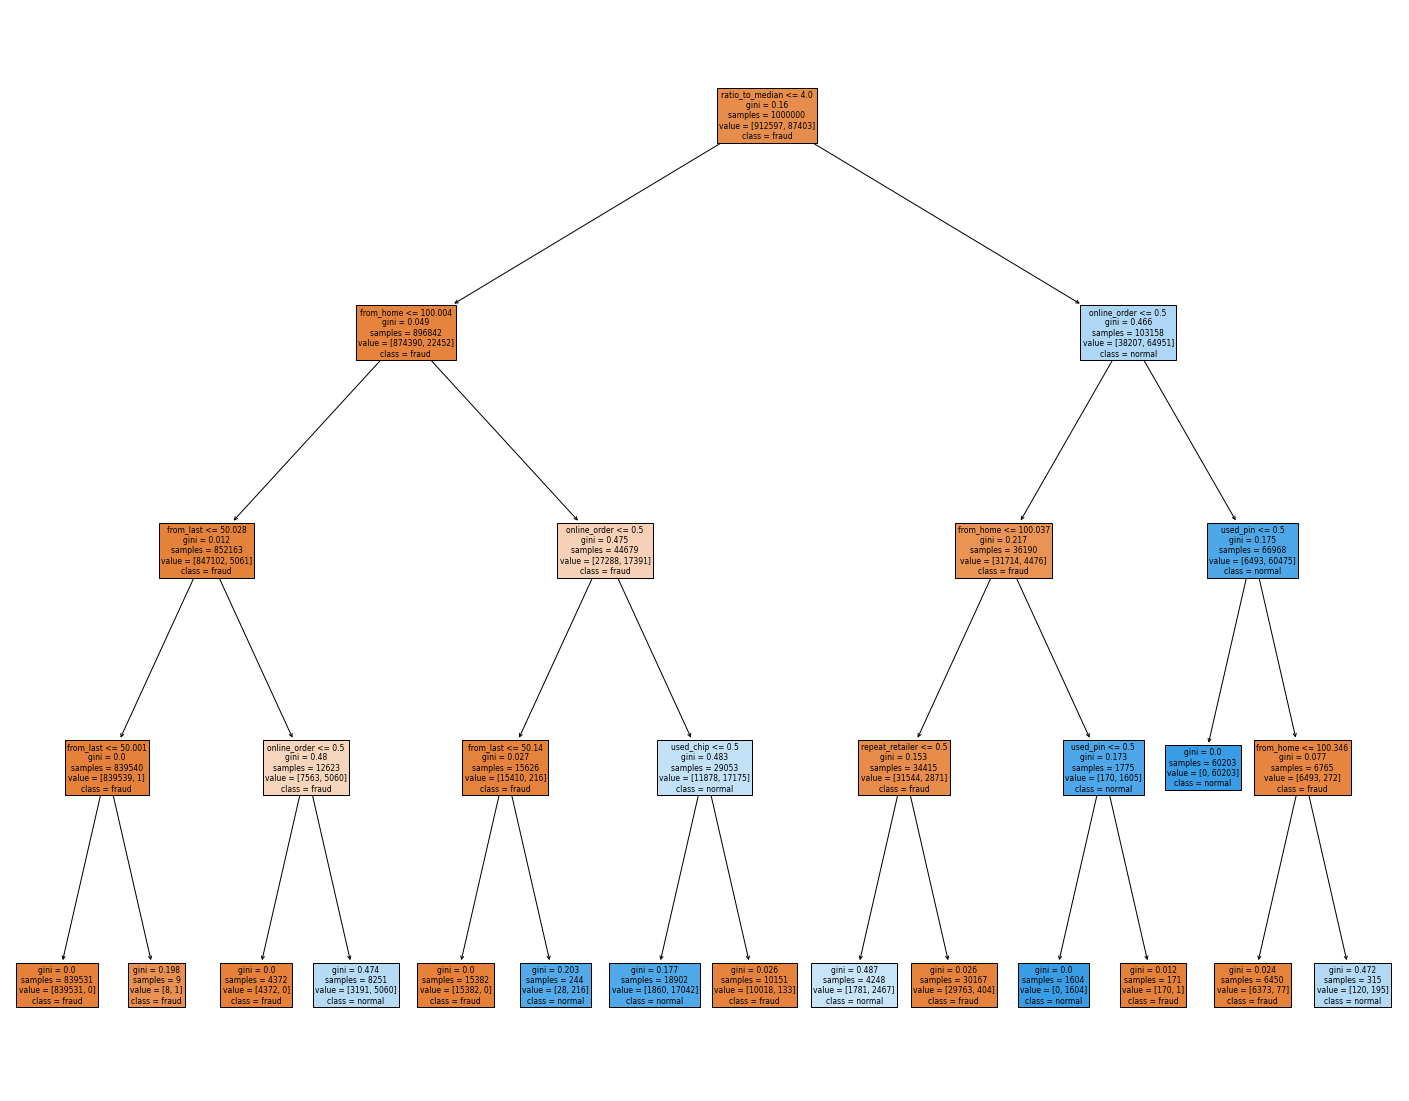

In [13]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, feature_names=['from_home','from_last','ratio_to_median','repeat_retailer','used_chip','used_pin', 'online_order'	],
                   class_names=['fraud','normal'],
                   filled=True)

***

## Data Preprocessing
Looking for below points for preprocessing the data
- missing values
- data standardization 
- data normalization
- data binning

### Handle Missing Values

In [14]:
df.isna().sum() # check for missing data

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

As we don't have missing data or null values in dataset, we dont need to handle that filling data or by data imputation

### Drop Duplicates

In [15]:
df.shape #Initial size

(1000000, 8)

In [16]:
df.drop_duplicates()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [17]:
df.shape

(1000000, 8)

Size of df is same after attempting to remove duplicate rows, which means data doesn't have duplicate rows

***

## Train - Test split of data

In [18]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

X = df.loc[:, df.columns != 'fraud']
y = df.fraud

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Train Model

In [40]:
def model_evaluation(y_train, y_train_pred, y_test, y_pred):
    print("Train Accuracy: {} %".format(metrics.accuracy_score(y_train, y_train_pred)*100))
    print("Train Confusion Matrix:")
    cf_train_matrix = metrics.confusion_matrix(y_train, y_train_pred)
    report = metrics.classification_report(y_train, y_train_pred)
    print(report)
    
    
    print("Test Accuracy: {} %".format(metrics.accuracy_score(y_test, y_pred)*100))
    print("Test Confusion Matrix:")  
    report = metrics.classification_report(y_test, y_pred)
    print(report)

    cf_matrix = metrics.confusion_matrix(y_test, y_pred)    
    
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
    
    sns.heatmap(cf_train_matrix, annot=True, cmap='Blues', fmt='g', ax=ax1)
    ax1.set_title('Confusion Matrix - Train Data\n\n')
    ax1.set_xlabel('\nPredicted Values')
    ax1.set_ylabel('Actual Values ')
    ax1.xaxis.set_ticklabels(['False','True'])
    ax1.yaxis.set_ticklabels(['False','True'])
    
    sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g', ax=ax2)
    ax2.set_title('Confusion Matrix - Train Data\n\n')
    ax2.set_xlabel('\nPredicted Values')
    ax2.set_ylabel('Actual Values ')
    ax2.xaxis.set_ticklabels(['False','True'])
    ax2.yaxis.set_ticklabels(['False','True'])
    plt.tight_layout()
    plt.show()

In [41]:
def plot_feature_importance(model, model_name):
    importance = model.feature_importances_
    ax = sns.barplot(x = importance,y = X_train.columns)
    ax.set_title('Feature Importance - {}'.format(model_name))
    plt.show()

### Decision Tree Classifier

Train Accuracy: 99.24253731343283 %
Train Confusion Matrix:
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00    611385
         1.0       0.93      0.99      0.96     58615

    accuracy                           0.99    670000
   macro avg       0.96      0.99      0.98    670000
weighted avg       0.99      0.99      0.99    670000

Test Accuracy: 99.23575757575757 %
Test Confusion Matrix:
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00    301212
         1.0       0.93      0.99      0.96     28788

    accuracy                           0.99    330000
   macro avg       0.96      0.99      0.98    330000
weighted avg       0.99      0.99      0.99    330000



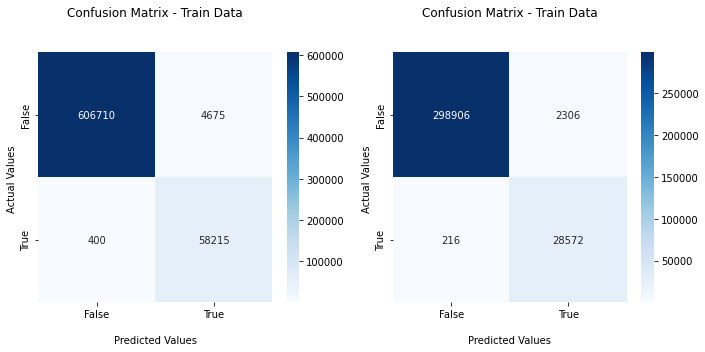

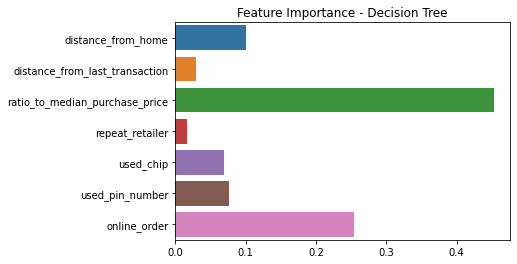

In [42]:
from sklearn.tree import DecisionTreeClassifier 

decision_tree_clf = DecisionTreeClassifier(random_state=1234, max_depth=4)
decision_tree_model = decision_tree_clf.fit(X_train, y_train)

y_train_pred = decision_tree_model.predict(X_train)
y_pred = decision_tree_model.predict(X_test)

model_evaluation(y_train, y_train_pred, y_test, y_pred)
plot_feature_importance(decision_tree_model, 'Decision Tree')

### Random Forest Classifier

Train Accuracy: 97.95611940298508 %
Train Confusion Matrix:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99    611385
         1.0       1.00      0.77      0.87     58615

    accuracy                           0.98    670000
   macro avg       0.99      0.88      0.93    670000
weighted avg       0.98      0.98      0.98    670000

Test Accuracy: 97.95363636363636 %
Test Confusion Matrix:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99    301212
         1.0       1.00      0.77      0.87     28788

    accuracy                           0.98    330000
   macro avg       0.99      0.88      0.93    330000
weighted avg       0.98      0.98      0.98    330000



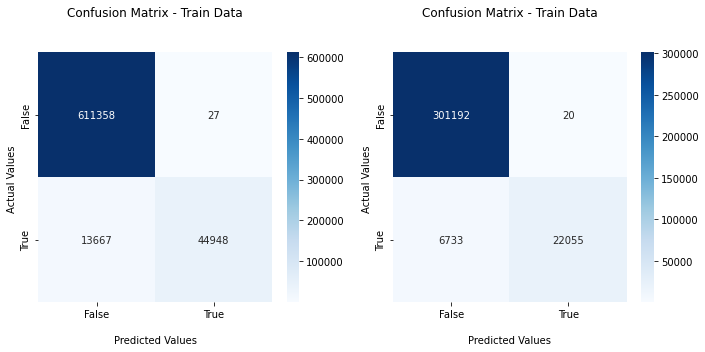

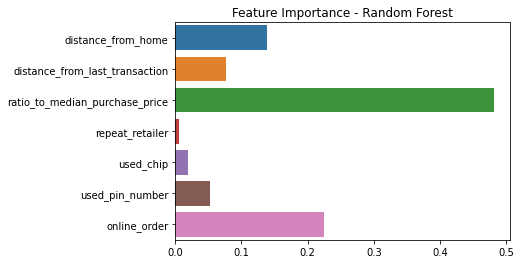

In [43]:
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

random_forest_clf = RandomForestClassifier(random_state=1234, max_depth=4)
random_forest_model = random_forest_clf.fit(X_train, y_train)

y_train_pred = random_forest_model.predict(X_train)
y_pred = random_forest_model.predict(X_test)
model_evaluation(y_train, y_train_pred, y_test, y_pred)
plot_feature_importance(random_forest_model, 'Random Forest')

### KNN

Accuracy: 98.16757575757575 %
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99    301212
         1.0       0.88      0.92      0.90     28788

    accuracy                           0.98    330000
   macro avg       0.94      0.95      0.94    330000
weighted avg       0.98      0.98      0.98    330000



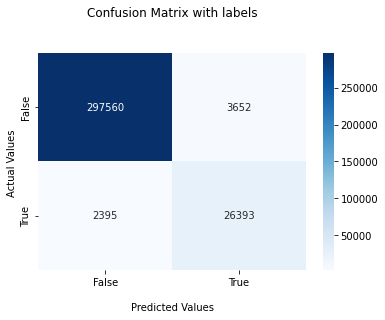

In [57]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=7)
 
knn_model = knn_clf.fit(X_train, y_train)

y_train_pred = knn_model.predict(X_train)
y_pred = knn_model.predict(X_test)
model_evaluation(y_train, y_train_pred, y_test, y_pred)
 
# Calculate the accuracy of the model
# print(knn.score(X_test, y_test))